# __Creacion de IA clasificativa con Red Neuronal__

### __1-Importación de librerias__
Importamos las siguientes librerías para el desarrollo de la Red Neuronal clasificativa

In [6]:
import numpy as np
import scipy as sc 
import matplotlib.pyplot as plt 

from sklearn.datasets import make_circles

### __2-Creación del DataSet__
Una vez importadas las librerías crearemos el data set con la función `make_circles`. Tenemos una muestra de 500 datos (`n`) donde cada muestra puede tener dos valores (`p`).

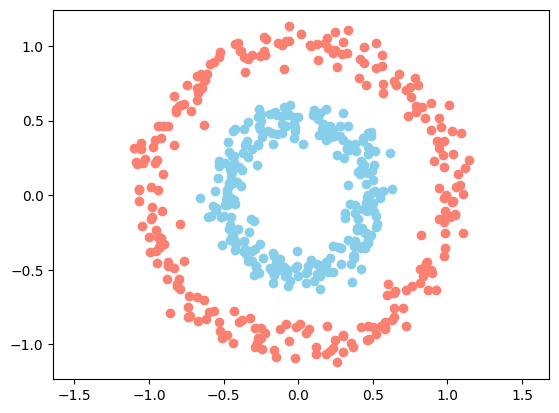

In [7]:
n = 500
p = 2

# La función make_circles genera un dataset con datos circulares en función de parámetros
# El valor de factor (entre 0 y 1) define como de pegados o alejados estan los circulos
# El valor de noise (entre 0 y 1) introduce ruido a la muestra
X, Y = make_circles(n_samples=n, factor=0.5, noise= 0.07)

Y = Y[:, np.newaxis]

plt.scatter(X[ Y[:, 0] == 0, 0], X[ Y[:, 0] == 0, 1], c="salmon")
plt.scatter(X[ Y[:, 0] == 1, 0], X[ Y[:, 0] == 1, 1], c="skyblue")
plt.axis("equal")
plt.show()

### __3-Creación de la clase capa neuronal__
Ahora crearemos una clase que recoja el formato principal de una capa neuronal de una red neuronal. Como sabemos esto involucra pesos (`w`) y sesgos (`b`). Cada capa tiene un número de conexiones que llegan de cada neurona de la capa anterior a la capa actual y cada neurona tiene un nivel de activación dado por la función de activación (`f_act`). Vamos a ver esto en el código. Para generar esto, utilizaremos vectores. Un vector con una fila y un número de columnas igual a `n_neur` que es el número de neuronas de la capa. Luego creamos una matriz con un número de filas igual a `n_conn`, que es el número de conexiones que llegan desde la capa anterior a una neurona. Es decir la primera columna de esta matriz tendría todos los pesos de las neuronas de la capa anteior hacia la primera neurona de esta capa. 

Como `np.random.rand(filas, columnas)` genera vectores/matrices donde se especifican primero el número de filas y luego el de columnas, y genera valores aleatorios entre 0 y 1. Pero tenemos que escalar estos valores a nuestro dataset, que contiene pares de coordenadas entre -1 y 1. Para eso multiplicamos el resultado por 2 y le restamos 1.

In [8]:
class neural_layer():
    
    def __init__(self, n_conn, n_neur, f_act):
        self.f_act = f_act
        self.b = np.random.rand(1, n_neur) * 2 - 1 
        self.W = np.random.rand(n_conn, n_neur) * 2 - 1

### __4-Funciones de Activación__
Podemos usar distintas funciones de activación, en este caso usaremos la función sigmoide. Implementaremos dos funciones en la función sigmoide. La primera es la función sigmoide en si misma ($\sigma(x) = \frac{1}{1 + e^{-x}}$) y la función derivada de esta misma en función de la entrada (`x`) ($\sigma'(x) = \sigma(x)\,(1 - \sigma(x))$)

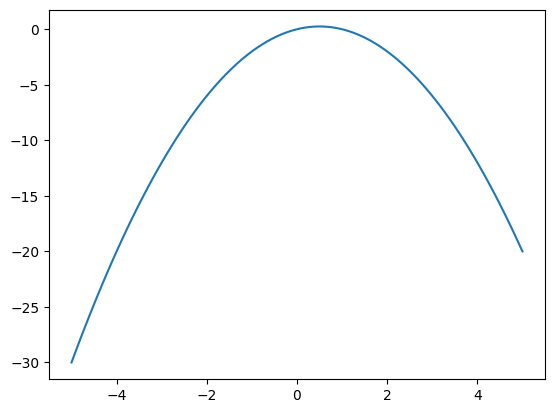

In [9]:
# Función 1 (Función sigmoide)
# Función 2 (Derivada función sigmoide)
sigm = (lambda x: 1 / (1 + np.e**(-x)), 
        lambda x: x * (1 - x))

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[1](_x))

### __5-Creación de red neuronal__
Ahora crearemos la clase que cree la red neuronal. Para esta función pasaremos una topología de capas, donde definiremos el número de capas y el número de nueronas de cada capa.

La función crea una lista donde se almacenarán todas las capas de la red ordenadas, desde la capa de entrada a la capa de salida. Luego añade una capa neuronal con un bucle for donde se añaden el numero de conexiones de la primera capa y el número de neuronas de la siguiente, usando la función sigmoide.

In [10]:
def create_nn(topology, f_act):
    # Creamos un vector que almacene todas las capas
    nn = []
    
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l], topology[l+1], f_act))
    return nn

### __6-Entrenamiento de la red__
Ahora entrenaremos a nuestra red 

In [20]:
topology = [p, 4, 8, 16, 8, 4, 1]

neural_net = create_nn(topology, sigm)

# Definimos la función de costes (error cuadrático medio ponderado)
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr)**2),
           lambda Yp, Yr: (Yp - Yr))

out = [(None, X)]

# Creamos la función de train que tedra 3 pasos
def train(neural_net, X, Y, l2_cost, lr=0.5, train = True):
    
    # Forward pass
    for l, layer in enumerate(neural_net):
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b 
        a = neural_net[l].f_act[0](z)
        
        out.append((z, a))
    
    
    if train:
        # Backward pass
        deltas = []
        
        for l in reversed(range(0, len(neural_net))):
            
            z = out[l+1][0]
            a = out[l+1][1]
            
            # Primera capa
            if l == len(neural_net) - 1:
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].f_act[1](a))
            # Resto de capas
            else:
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].f_act[1](a))
            
            _W = neural_net[l].W 

            # Gradient Descend
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr 
            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
                
        return out[-1][1]
    

train(neural_net, X, Y, l2_cost, lr=0.5)

array([[0.09857691],
       [0.09891632],
       [0.09878798],
       [0.09866163],
       [0.09877854],
       [0.0983536 ],
       [0.09897102],
       [0.09878063],
       [0.09870856],
       [0.09875568],
       [0.09859545],
       [0.09868772],
       [0.09847065],
       [0.09885947],
       [0.09856963],
       [0.09888508],
       [0.09907873],
       [0.09883126],
       [0.09861281],
       [0.09875868],
       [0.09836319],
       [0.09894427],
       [0.09875252],
       [0.09857659],
       [0.09902006],
       [0.0989282 ],
       [0.0987047 ],
       [0.09881705],
       [0.09857604],
       [0.09881137],
       [0.09880158],
       [0.09893384],
       [0.09885079],
       [0.09840754],
       [0.09879577],
       [0.09861   ],
       [0.09854928],
       [0.09890882],
       [0.09887709],
       [0.09861349],
       [0.09877226],
       [0.09851154],
       [0.09914662],
       [0.09910907],
       [0.09898411],
       [0.09865284],
       [0.09898415],
       [0.098